<a href="https://colab.research.google.com/github/agarwalarpit99/Deep-Learning-projects/blob/master/MNIST_USING_CNN_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libaries
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/train.csv')
test=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(42000, 785)

In [0]:
#Separate feature and Data
Y=train['label']
X=train.drop('label',axis=1)

In [0]:
#Data Preprocessing
ytrain=Y.values
xtrain=X.values
test=test.values

In [0]:
xtrain=xtrain/255.0
test=test/255.0

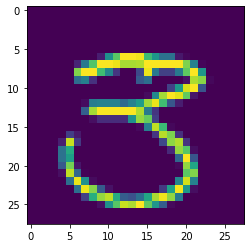

3

In [6]:
#Data Visualizing
plt.imshow(xtrain[7].reshape(28,28))
plt.show()
ytrain[7]

In [0]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)

In [0]:
#Changing shape of an input for making in shape in which out CNN  model understand
xtrain=xtrain.reshape(len(xtrain),28,28,1)
test=test.reshape(len(test),28,28,1)

In [0]:
#Implementing CNN model
from keras.layers import Conv2D,Flatten,MaxPool2D,Dropout,Dense
from keras import Sequential

In [0]:
classifier=Sequential()
classifier.add(Conv2D(64,kernel_size=3,input_shape=(28,28,1)))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(64,kernel_size=3))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=10,activation='softmax'))

In [0]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#Fitting the model
history=classifier.fit(xtrain,ytrain,validation_split=0.3,epochs=40)

Train on 29399 samples, validate on 12601 samples
Epoch 1/40
29399/29399 [==============================] - 7s 227us/step - loss: 0.2639 - acc: 0.9174 - val_loss: 0.0790 - val_acc: 0.9756
Epoch 2/40
29399/29399 [==============================] - 6s 206us/step - loss: 0.0906 - acc: 0.9716 - val_loss: 0.0521 - val_acc: 0.9834
Epoch 3/40
29399/29399 [==============================] - 6s 203us/step - loss: 0.0699 - acc: 0.9782 - val_loss: 0.0455 - val_acc: 0.9861
Epoch 4/40
29399/29399 [==============================] - 6s 208us/step - loss: 0.0568 - acc: 0.9818 - val_loss: 0.0589 - val_acc: 0.9842
Epoch 5/40
29399/29399 [==============================] - 6s 210us/step - loss: 0.0465 - acc: 0.9849 - val_loss: 0.0575 - val_acc: 0.9840
Epoch 6/40
29399/29399 [==============================] - 6s 213us/step - loss: 0.0429 - acc: 0.9861 - val_loss: 0.0463 - val_acc: 0.9862
Epoch 7/40
29399/29399 [==============================] - 6s 202us/step - loss: 0.0402 - acc: 0.9870 - val_loss: 0.0489 - 

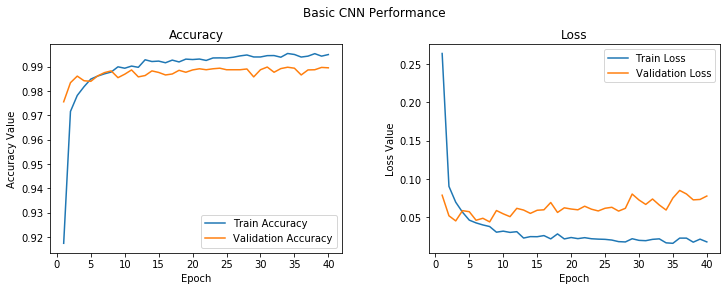

In [19]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,41))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 41, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 41, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
#Taking predictions
prediction=classifier.predict(test)

In [0]:
#for converting index to the particular label or value 
lt2=[]
x=0.0
ind=0
for i in range(0,len(prediction)):
  lt=[]
  lt=list(prediction[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt2.append(ind)  



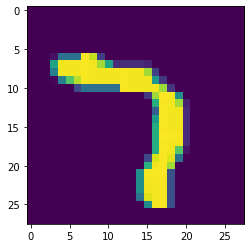

7


In [26]:
plt.imshow(test[45].reshape(28,28))
plt.show()
print(lt2[45])

In [0]:
#Submissions
sample=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/sample_submission.csv')

In [0]:
sample.drop('Label',axis=1,inplace=True)

In [0]:
sample['Label']=pd.DataFrame(lt2)

In [0]:
sample.to_csv('mnist_sub_cnn10.csv',index=False)

In [0]:
#This submission got 98.88% accuracy and get my rank in top 46%
https://www.kaggle.com/arpitkumaragarwal